In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time

In [3]:
train_df = pd.read_csv("train.csv.gz", compression='gzip')
test_df = pd.read_csv("test.csv.gz", compression='gzip')

# Show a sample of the datasets
print("Train Data Sample")
display(train_df.head())

print("Test Data Sample")
display(test_df.head())

Train Data Sample


,name,description,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,reviews,price
0,1 bedroom apt 10469,You'll have a great time at this comfortable p...,Jose,2019-10-01,"New York, NY",NaN,within an hour,86%,81%,t,...,5,0,0,NaN,271.0,0.0,0.0,0.0,NaN,70.0
1,Spacious 3x2 for Visiting ATX,"This is a 3 bedroom, 2 bathroom condo in the h...",Susana,2019-07-17,"Austin, TX",Hey y'all! My name is Susana & I'm so happy th...,within an hour,96%,100%,f,...,47,0,0,1.08,0.0,1.0,18.0,1584.0,NaN,88.0
2,Spacious place Palm Culver City,Bring the whole family to this great place wit...,Dee,2012-07-30,"Los Angeles, CA",I am a mental health professional in addition ...,within an hour,100%,99%,f,...,21,0,0,NaN,304.0,0.0,0.0,0.0,NaN,130.0
3,2-bedroom Mission Beach home with private patio,"Cute 2-bedroom, 1-bath, downstairs unit in dup...",Tracy,2014-01-14,"San Diego, CA",NaN,within an hour,100%,100%,t,...,3,0,0,2.72,NaN,NaN,NaN,NaN,Great place to stay with little caveats. Ye wa...,231.0
4,334-cozy apt 5 mins to beach,Discover comfort in Prime Fort Lauderdale Loca...,Michael,2024-06-06,"Hollywood, FL","Hello! \nI'm a proud Floridian, having lived h...",within an hour,100%,67%,t,...,16,2,0,1.00,NaN,NaN,NaN,NaN,NaN,129.0


Test Data Sample


,name,description,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,reviews
0,Luxury private room near JFK Int. Airport New ...,Luxury spacious private room with attached ful...,Mohammed,2022-07-24,"New York, NY",Knowledge Comes Before Speech and Action ( الع...,within an hour,100%,93%,t,...,20,1,19,0,0.50,305.0,3.0,180.0,8460.0,NaN
1,Beautiful resort 1 bedroom full kitchen,Make some memories at this unique and family-f...,Ronnie,2019-08-30,NaN,Love people and loves God,within a day,100%,0%,f,...,2,2,0,0,0.05,NaN,NaN,NaN,NaN,NaN
2,Specious large alcove studio,Super large specious studio loft style located...,Yael,2015-08-04,"New York, NY",NaN,within an hour,100%,100%,f,...,17,17,0,0,0.08,276.0,1.0,0.0,0.0,NaN
3,Quiet bedroom with private bathroom,"4 bedroom home, 3 upstairs, 1 downstairs. Mod...",Natallia,2012-02-19,"San Francisco, CA",We enjoy the Airbnb experience--what cultures ...,within an hour,100%,100%,f,...,5,2,3,0,0.63,136.0,10.0,255.0,21420.0,Highly recommend the property! The Sonder was ...
4,Sunny Good Vibes with View & Work from Home,Welcome to Sunny Good Vibes in the historic Mi...,Garret,2017-04-27,United States,I’m the owner and operator of Sunny Good Vibes...,within an hour,100%,99%,t,...,2,2,0,0,3.05,NaN,NaN,NaN,NaN,NaN


In [4]:
# Outlier Removal Section
start_time = time.time()

o_train_df = train_df.copy()
lower_cap = o_train_df['price'].quantile(0.01)
upper_cap = o_train_df['price'].quantile(0.99)
o_train_df['price'] = o_train_df['price'].clip(lower=lower_cap, upper=upper_cap)

end_time = time.time()
print(f"Outlier Removal Section Execution Time: {end_time - start_time:.2f} seconds")

Outlier Removal Section Execution Time: 0.02 seconds


In [5]:
# Manual Feature Removal Section (I decided to remove some features that I already know won't be useful for prediction so I can reduce preprocessing runtime)
start_time = time.time()
categorical_features = [
    'property_type',
    'room_type',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'host_response_time',
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'has_availability',
    'instant_bookable',
    'calendar_updated',
    'host_name',
    'host_location',
    'host_neighbourhood',
    'license',
    'host_verifications'
]

text_features = [
    'name',
    'description',
    'host_about',
    'reviews',
    'bathrooms_text',
    'amenities'
]

numerical_features = [
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'host_listings_count',
    'host_total_listings_count',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'minimum_nights',
    'maximum_nights',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'reviews_per_month',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'estimated_occupancy_l365d',
    'estimated_revenue_l365d',
    'availability_eoy',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'host_response_rate',
    'host_acceptance_rate',
    'number_of_reviews_ly'
]

manual_remove_features = [
    'calendar_updated',
    'license',
    'host_about',
    'reviews',
    'host_location',
    'neighbourhood',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'host_name',
    'bathrooms_text',
    'host_since',
    'first_review',
    'last_review',
]

# If there are any other types of NA values then set them all to np.nan for consistency
missing_indicators = ["NA", "na", "n/a", "null", "None", ""]
m_train_df = o_train_df.replace(missing_indicators, np.nan)

missing_thresh = 0.5
missing_cols = m_train_df.isnull().mean()
high_missing_cols = missing_cols[missing_cols > missing_thresh].index.tolist()

# Update remove_features to include them
remove_features = list(set(manual_remove_features + high_missing_cols))

categorical_features = [f for f in categorical_features if f not in remove_features]
numerical_features   = [f for f in numerical_features if f not in remove_features]
text_features = [f for f in text_features if f not in remove_features]

f_train_df = m_train_df.drop(columns=remove_features)
f_test_df = test_df.drop(columns=remove_features)

print(f_train_df.columns.tolist())
end_time = time.time()
print(f"Manual Feature Removal Section Execution Time: {end_time - start_time:.2f} seconds")

['name', 'description', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'ca

In [6]:
# Value Cleaning Section - deals with missing cell values and fixing variable types like tuples
start_time = time.time()
def clean_numeric_column(df, col):
    # Convert percentages (e.g. '86%') and text numbers (e.g. '2 baths')
    df[col] = df[col].astype(str).str.extract(r'([\d.]+)').astype(float)
    return df
        
# Fill in missing numerical values with column averages
for col in numerical_features:
    f_train_df = clean_numeric_column(f_train_df, col) 
    mean_value = f_train_df[col].mean()
    f_train_df[col] = f_train_df[col].fillna(mean_value)
    
    f_test_df = clean_numeric_column(f_test_df, col)
    # Use the same mean as from the training set to avoid leakage
    f_test_df[col] = f_test_df[col].fillna(mean_value)

# Fill in missing text values with empty strings
for col in text_features:
    f_train_df[col] = f_train_df[col].fillna('').astype(str)
    f_test_df[col] = f_test_df[col].fillna('').astype(str)

# Fill in categorical features with "missing" category
for col in categorical_features:
    f_train_df[col] = f_train_df[col].astype(str).fillna('missing')
    f_test_df[col] = f_test_df[col].astype(str).fillna('missing')

# These 2 features are tuples so concatenate them into one string
columns_to_join = ['amenities', 'host_verifications']
for col in columns_to_join:
    f_train_df[col] = f_train_df[col].fillna('').apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))
    f_test_df[col] = f_test_df[col].fillna('').apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))

end_time = time.time()
print(f"Value Cleaning Section Execution Time: {end_time - start_time:.2f} seconds")

Value Cleaning Section Execution Time: 7.54 seconds


In [7]:
# Scales the numerical data
start_time = time.time()
sf_train_df = f_train_df.copy()
sf_test_df = f_test_df.copy()
scaler = StandardScaler()
sf_train_df[numerical_features] = scaler.fit_transform(f_train_df[numerical_features])
sf_test_df[numerical_features] = scaler.transform(f_test_df[numerical_features])

end_time = time.time()
print(f"Scaling Section Execution Time: {end_time - start_time:.2f} seconds")

Scaling Section Execution Time: 0.13 seconds


In [8]:
# One-hot encoding for categorical features
start_time = time.time()
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_train = encoder.fit_transform(sf_train_df[categorical_features])
encoded_test = encoder.transform(sf_test_df[categorical_features])
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_features), index=sf_train_df.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_features), index=sf_test_df.index)

# Drop the old categorical columns
esf_train_df = sf_train_df.drop(columns=categorical_features)
esf_test_df = sf_test_df.drop(columns=categorical_features)

# Concatenate encoded columns
esf_train_df = pd.concat([esf_train_df, encoded_train_df], axis=1)
esf_test_df = pd.concat([esf_test_df, encoded_test_df], axis=1)

end_time = time.time()
print(f"One-Hot Encoding Section Execution Time: {end_time - start_time:.2f} seconds")

One-Hot Encoding Section Execution Time: 2.88 seconds


In [9]:
# TF-IDF for text features
import string
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from pandas.api.types import CategoricalDtype

start_time = time.time()

def remove_punctuation(s):
    """
    Remove punctuation from a string
    """
    return s.translate(str.maketrans('','', string.punctuation))

def preprocess_line(line):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    return [
                lemmatizer.lemmatize(stemmer.stem(w.lower())) 
                for w in remove_punctuation(line).split() 
                if len(w) > 0 and w.lower() not in stop_words
        ] 

def process_train_data_text(df, tokenizer):
    # Create a (name, transformer, column) tuple for each text feature
    text_transformers = [
        (f"{col}_tfidf", TfidfVectorizer(
            tokenizer=tokenizer,
            preprocessor=None,
            lowercase=False,
            stop_words=None,
            max_features=500
        ), col)
        for col in text_features
    ]

    # Combine all TF-IDF transformers
    text_pipeline = ColumnTransformer(transformers=text_transformers)

    # Fit and transform the training data
    train_text = text_pipeline.fit_transform(df)

    return train_text, text_pipeline

train_text, text_pipeline = process_train_data_text(esf_train_df, preprocess_line)
test_text = text_pipeline.transform(esf_test_df)

num_cols = esf_train_df.drop(columns=text_features + ['price']).select_dtypes(include=[np.number]).columns

column_names = text_pipeline.get_feature_names_out()

df_text_train = pd.DataFrame(train_text.toarray(), columns=column_names, index=esf_train_df.index)
df_text_test = pd.DataFrame(test_text.toarray(), columns=column_names, index=esf_test_df.index)

tesf_train_df = pd.concat([esf_train_df.drop(columns=text_features), df_text_train], axis=1)
tesf_test_df = pd.concat([esf_test_df.drop(columns=text_features), df_text_test], axis=1)

end_time = time.time()
print(f"TF-IDF Section Execution Time: {end_time - start_time:.2f} seconds")

/WAVE/users2/unix/avattuone/.conda/envs/140wi25/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF Section Execution Time: 308.52 seconds


In [10]:
# Dimensionality reduction
from sklearn.decomposition import PCA
start_time = time.time()

pca = PCA(n_components=20)
train_pca_input = tesf_train_df.drop(columns=['price'])
train_pca = pca.fit_transform(train_pca_input)
test_pca = pca.transform(tesf_test_df)
pca_feature_names = [f'PC{i+1}' for i in range(pca.n_components_)]
rtesf_train_df = pd.DataFrame(train_pca, columns=pca_feature_names, index=tesf_train_df.index)
rtesf_test_df = pd.DataFrame(test_pca, columns=pca_feature_names, index=tesf_test_df.index)
rtesf_train_df['price'] = tesf_train_df['price'].values

end_time = time.time()
print(f"PCA Dimensionality Reduction Section Execution Time: {end_time - start_time:.2f} seconds")

PCA Dimensionality Reduction Section Execution Time: 9.86 seconds


In [11]:
# Displays which features have the most weight for each PCA value after PCA. 
start_time = time.time()
components = pca.components_  # shape: [n_components, n_original_features]
n_top = 5  # How many top features per PC to display
feature_names = train_pca_input.columns.tolist()

for i, component in enumerate(components):
    print(f"\nPrincipal Component {i+1}")
    # Get indices of top absolute value contributions
    top_indices = np.argsort(np.abs(component))[::-1][:n_top]
    for idx in top_indices:
        print(f"{feature_names[idx]:<30} {component[idx]:+.4f}")

end_time = time.time()
print(f"PCA Feature Weight Display Section Execution Time: {end_time - start_time:.2f} seconds")


Principal Component 1
review_scores_rating           +0.2637
review_scores_value            +0.2593
review_scores_accuracy         +0.2533
review_scores_cleanliness      +0.2436
review_scores_communication    +0.2432

Principal Component 2
review_scores_rating           +0.2971
review_scores_accuracy         +0.2890
review_scores_value            +0.2735
review_scores_communication    +0.2677
review_scores_checkin          +0.2618

Principal Component 3
calculated_host_listings_count_entire_homes +0.3233
calculated_host_listings_count +0.3195
host_listings_count            +0.3186
host_total_listings_count      +0.2895
availability_60                -0.2882

Principal Component 4
accommodates                   +0.4638
bedrooms                       +0.4605
beds                           +0.4471
bathrooms                      +0.4210
number_of_reviews              -0.1413

Principal Component 5
availability_90                +0.3815
availability_60                +0.3742
availability_3

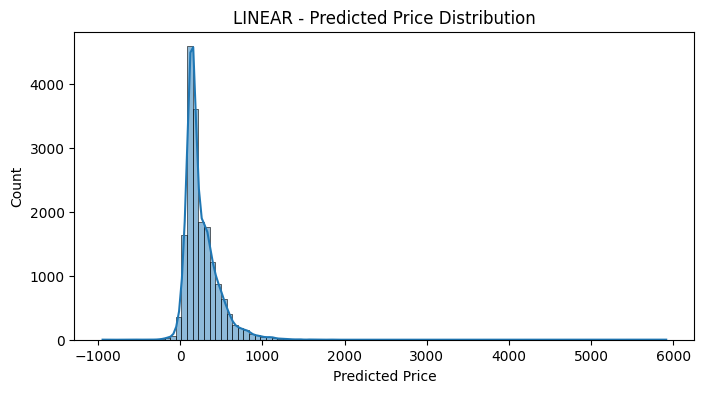

LINEAR - RMSE on Training Data: 219.2990
LINEAR - RMSE on Validation Data: 221.1365
linear runtime: 0.46 seconds


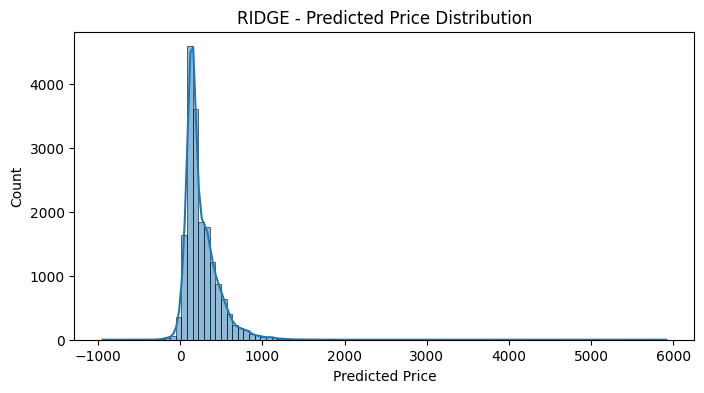

RIDGE - RMSE on Training Data: 219.2990
RIDGE - RMSE on Validation Data: 221.1364
ridge runtime: 0.32 seconds


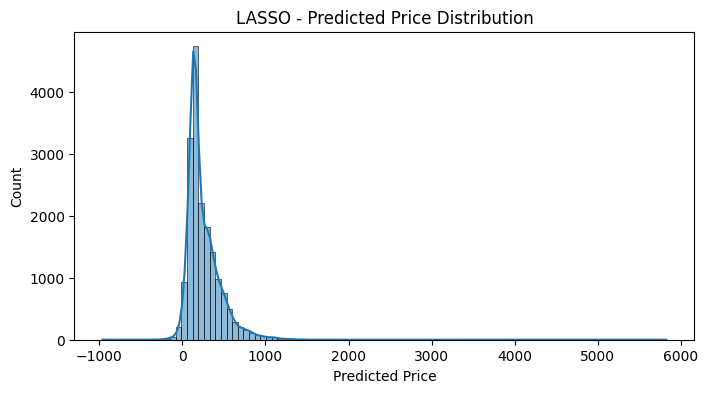

LASSO - RMSE on Training Data: 219.3456
LASSO - RMSE on Validation Data: 220.9636
lasso runtime: 0.37 seconds


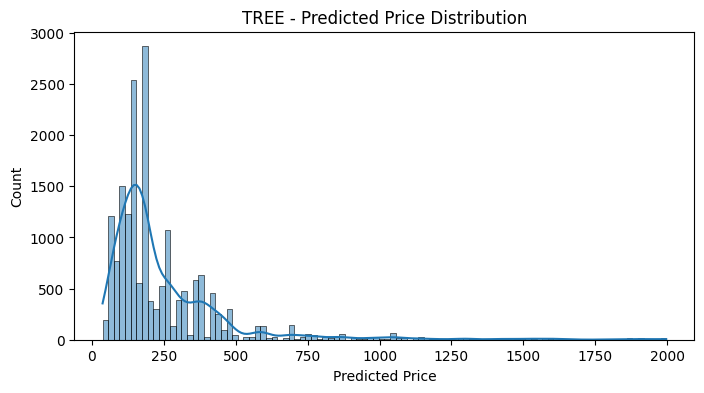

TREE - RMSE on Training Data: 181.0399
TREE - RMSE on Validation Data: 208.1590
tree runtime: 1.86 seconds


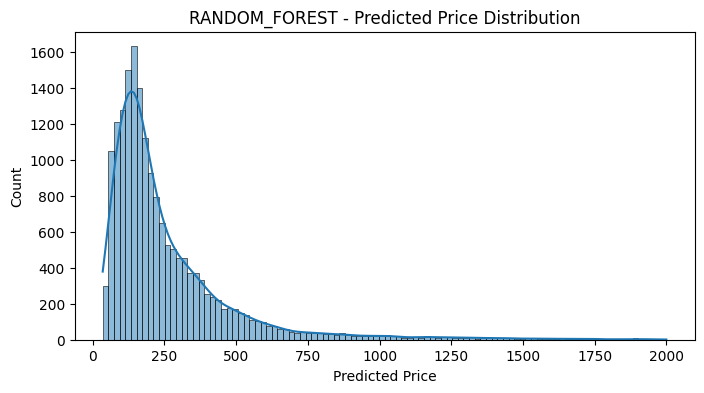

RANDOM_FOREST - RMSE on Training Data: 72.5221
RANDOM_FOREST - RMSE on Validation Data: 184.5917
random_forest runtime: 54.76 seconds


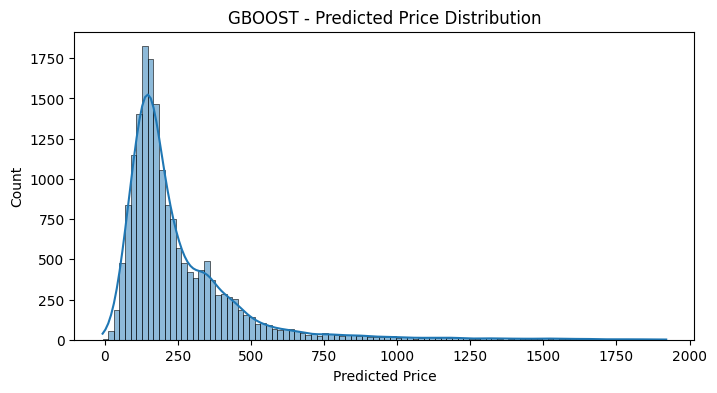

GBOOST - RMSE on Training Data: 190.0915
GBOOST - RMSE on Validation Data: 193.2666
gboost runtime: 56.65 seconds


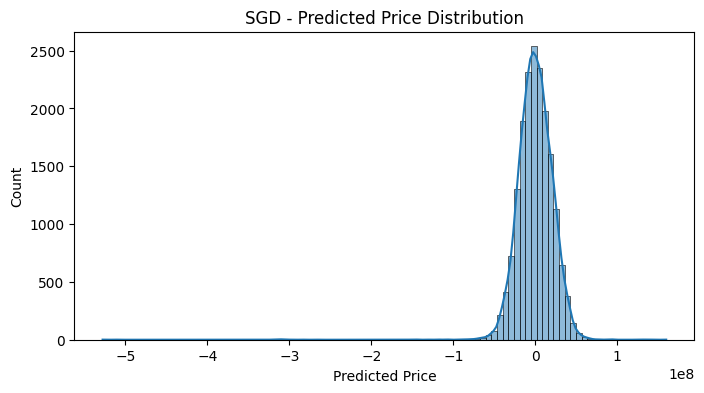

SGD - RMSE on Training Data: 5193848837.2697
SGD - RMSE on Validation Data: 22138936.7573
sgd runtime: 0.43 seconds
Total Model Prediction Section Execution Time: 0.43 seconds


In [16]:
# Predict the output using several different models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

start_time = time.time()

X_full = rtesf_train_df.drop(columns=['price'])  # Drop the target variable
y_full = rtesf_train_df['price']  # Target variable

X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

X_test = rtesf_test_df

models = {
    'linear': (LinearRegression(), True),
    'ridge': (Ridge(), True),
    'lasso': (Lasso(), True),
    'tree': (DecisionTreeRegressor(max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=42), False),
    'random_forest': (RandomForestRegressor(n_estimators=25, random_state=42), False),
    'gboost': (GradientBoostingRegressor(n_estimators=100, random_state=42), False),
    'sgd': (SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', random_state=42), True),
}

model_val_rmses = []

for name, (model, is_linear) in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(y_val_pred, bins=100, kde=True)
    plt.title(f"{name.upper()} - Predicted Price Distribution")
    plt.xlabel('Predicted Price')
    plt.ylabel('Count')
    plt.show()

    # RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    print(f"{name.upper()} - RMSE on Training Data: {train_rmse:.4f}")

    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print(f"{name.upper()} - RMSE on Validation Data: {val_rmse:.4f}")
    model_val_rmses.append((model, val_rmse))
    
    end_time = time.time()
    print(f"{name} runtime: {(end_time - start_time):.2f} seconds")

end_time = time.time()
print(f"Total Model Prediction Section Execution Time: {end_time - start_time:.2f} seconds")

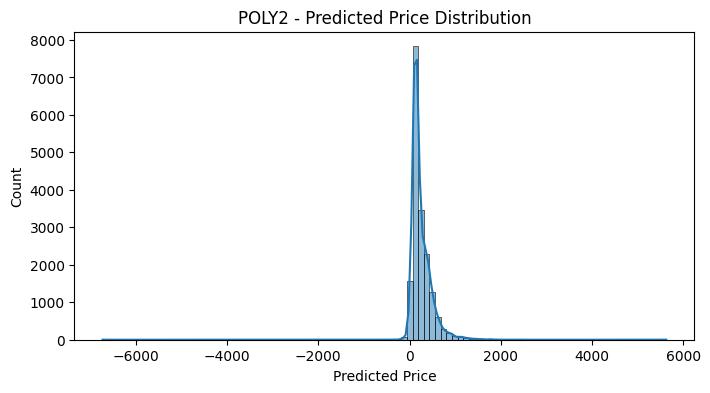

POLY2 - RMSE on Training Data: 198.5311
Polynomial Model Prediciton Section Execution Time: 1.21 seconds


In [17]:
# Separate polynomial modeling since it requires additional steps that the loop can't accomodate
from sklearn.preprocessing import PolynomialFeatures
start_time = time.time()

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)

# Train model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict
poly2_y_train_pred = poly_model.predict(X_train_poly)
poly2_y_val_pred = poly_model.predict(X_val_poly)

plt.figure(figsize=(8, 4))
sns.histplot(poly2_y_val_pred, bins=100, kde=True)
plt.title("POLY2 - Predicted Price Distribution")
plt.xlabel("Predicted Price")
plt.ylabel("Count")
plt.show()

poly2_rmse = np.sqrt(mean_squared_error(y_train, poly2_y_train_pred))
print(f"POLY2 - RMSE on Training Data: {poly2_rmse:.4f}")

end_time = time.time()
print(f"Polynomial Model Prediciton Section Execution Time: {end_time - start_time:.2f} seconds")

In [20]:
best_model, best_rmse = min(model_val_rmses, key=lambda x: x[1])
print(f"Best model: {best_model}, Validation RMSE: {best_rmse:.4f}")

best_model.fit(X_full, y_full)
y_pred = best_model.predict(X_test)
np.savetxt(f"{best_model}_predictions.dat", y_pred, fmt='%.8f')

Best model: RandomForestRegressor(n_estimators=25, random_state=42), Validation RMSE: 184.5917


KeyboardInterrupt: 